**Objective** -

The primary objective of this project is to perform customer segmentation by analyzing historical transactional data and identifying patterns in customer purchasing behavior. This will be achieved through Recency, Frequency, and Monetary (RFM) analysis, a well-established technique in customer relationship management (CRM), and by applying unsupervised machine learning algorithms, specifically K-Means Clustering, to uncover natural groupings within the customer base.

This segmentation is intended to equip businesses with actionable insights that can significantly enhance marketing strategies, customer engagement, and business profitability.

**Understanding and Quantifying Customer Behavior** -

The first step involves analyzing customer purchase history to compute three key behavioral metrics:

Recency: Measures how recently a customer made a purchase. Customers who purchased more recently are likely to be more engaged.

Frequency: Measures how often a customer purchases. Frequent buyers are often more loyal and have higher engagement.

Monetary: Measures how much money a customer has spent. High-spending customers are crucial for business profitability.

These RFM scores offer a quantifiable and interpretable framework to evaluate the value and engagement level of each customer.

**Applying K-Means Clustering for Unsupervised Segmentation** -

Once the RFM metrics are calculated and normalized, K-Means Clustering is applied to segment the customers into homogeneous groups based on similar behavioral patterns.

This unsupervised learning approach does not require any prior labeling and can automatically identify latent groupings that would be difficult to detect manually.

1. The clustering step helps classify customers into segments such as:

2. High-value loyal customers

3. New customers

4. Low-value occasional buyers

5. Churn-risk customers

**Enabling Data-Driven Business Decisions** -

By identifying these distinct customer groups, the business can:

Personalize marketing efforts by tailoring campaigns to specific segments.

Optimize resource allocation, focusing efforts on high-value or at-risk customers.

Improve customer experience by offering targeted promotions, loyalty programs, or re-engagement offers.

Enhance retention and conversion rates through timely and relevant communication.

This segmentation model shifts the business from a generalized mass-marketing approach to a data-driven, personalized strategy that enhances both customer satisfaction and business outcomes.

**Building a Scalable and Deployable Solution** -

Beyond analysis, the project includes deployment of the trained clustering model as a RESTful API, allowing real-time prediction of customer segments based on new RFM data.

This API can be integrated into internal tools, CRM systems, or marketing platforms to dynamically classify and act on customer data.

A simple front-end interface is also developed to make the tool accessible to non-technical users (e.g., marketing or sales teams).

Ultimately, the project delivers a practical, scalable solution for intelligent customer segmentation, empowering the business with:

1. Deeper insights into customer behavior,

2. Strategic marketing advantages,

3. And a robust foundation for improving Customer Lifetime Value (CLV) and business growth.


**Business Value of the Customer Segmentation Project**

Customer segmentation using RFM analysis and machine learning provides immense strategic and operational value to a business. This project enables a shift from traditional, intuition-driven marketing to a data-driven, customer-centric approach that enhances both profitability and customer satisfaction.

Below is a detailed breakdown of how the project creates business value:

1. **Personalized Marketing Campaigns**

By identifying distinct customer segments (e.g., high-value, low-frequency, at-risk), marketing teams can tailor campaigns that speak directly to the needs and behavior of each group.

For instance:

  1. High-value customers can receive loyalty rewards and exclusive offers.

  2. Churn-risk customers can be targeted with re-engagement campaigns.

This improves the effectiveness of campaigns and reduces customer acquisition and retention costs.

2. **Improved Customer Retention and Loyalty**

Retaining existing customers is significantly more cost-effective than acquiring new ones.

By tracking recency and frequency, businesses can detect signs of disengagement early and take proactive steps to retain those customers.

Predictive segmentation helps create retention programs that are timely, personalized, and relevant—leading to increased loyalty and repeat purchases.

3. **Increased Revenue and Profitability**

Segmentation identifies high-spending customers and helps maximize their lifetime value through upselling and cross-selling strategies.

Marketing efforts can focus on the most profitable segments, ensuring better allocation of budget and resources.

Conversion rates improve when customers receive offers aligned with their purchasing habits, driving higher returns on marketing investments.

4. **Strategic Business Decision-Making**

The insights from segmentation empower business leaders to make informed decisions about pricing, promotions, product offerings, and customer service.

For example:

  Knowing that a segment of customers is price-sensitive can inform discount strategies.

  Identifying new customers allows teams to focus on onboarding journeys and retention.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Data/Online_Retail.csv"


In [4]:
#Reading the CVS file
df = pd.read_csv(path)

In [5]:
# Copying the dataset for cleaning
df_clean = df.copy()

In [6]:
print(df.columns.tolist())
print(df_clean.columns.tolist())
len(df_clean.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


8

In [7]:
# Dataset First Look
print("First 5 Rows of the Dataset:")
print(df_clean.head())

First 5 Rows of the Dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [8]:
# Dataset Rows & Columns count
print("Number of Rows:", df_clean.shape[0])
print("Number of Columns:", df_clean.shape[1])

Number of Rows: 541909
Number of Columns: 8


In [9]:
# Dataset Info
print("Dataset Information: ")
print(df_clean.info())

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [10]:
# Dataset Duplicate Value Count
print("Number of Duplicate Values:", df_clean.duplicated().sum())

Number of Duplicate Values: 5268


In [11]:
# Missing Values/Null Values Count
print("Missing Values in each Columns of the Dataset: ")
print(df_clean.isnull().sum())

Missing Values in each Columns of the Dataset: 
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


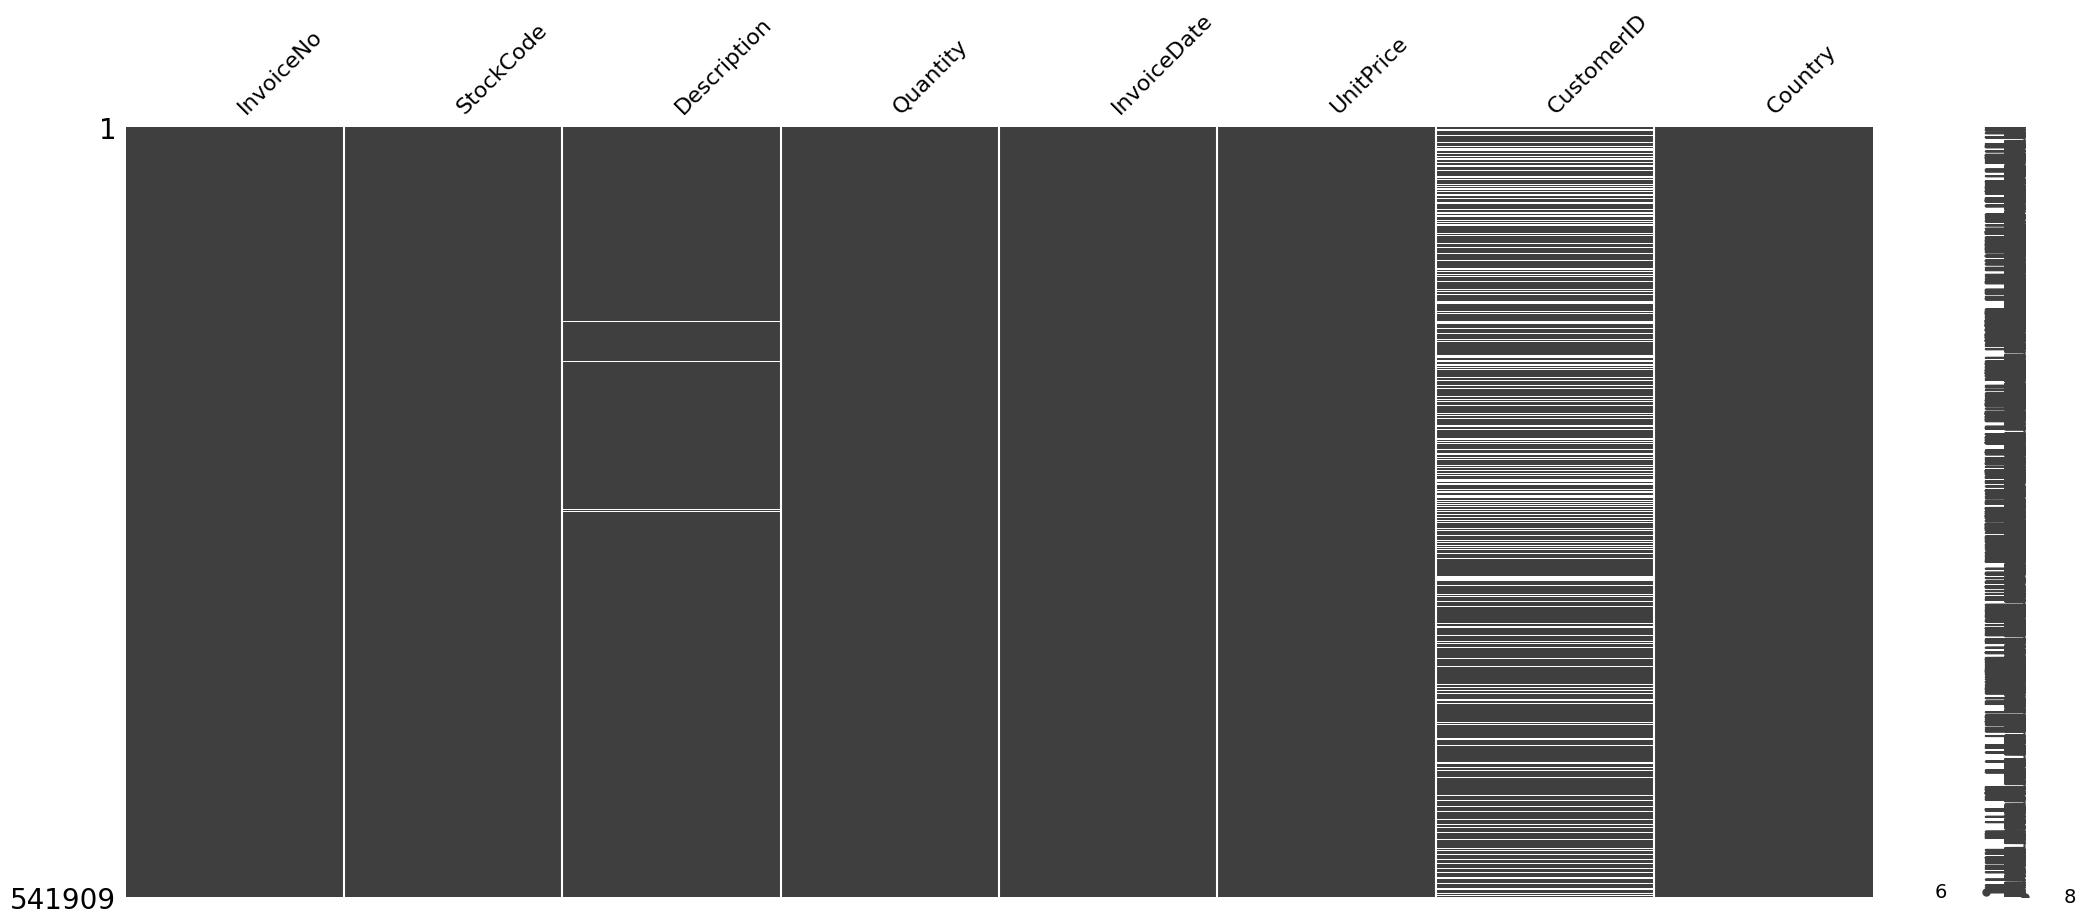

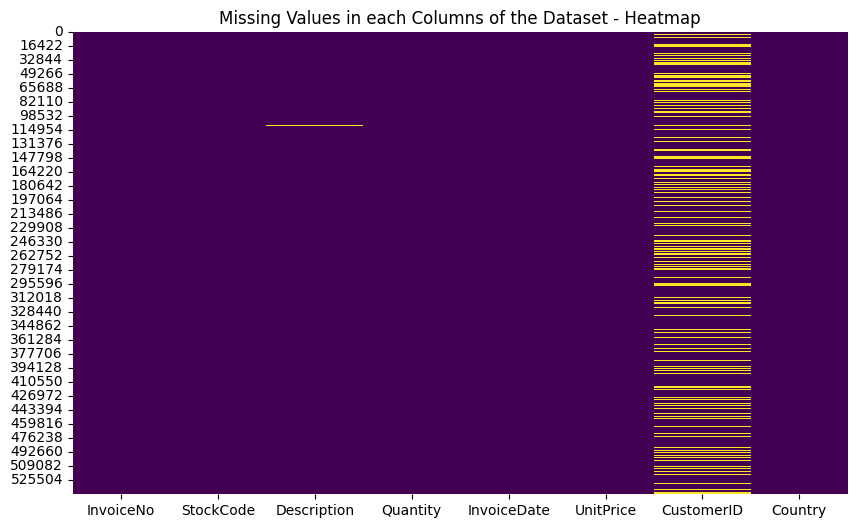

/tmp/ipython-input-12-925988311.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')


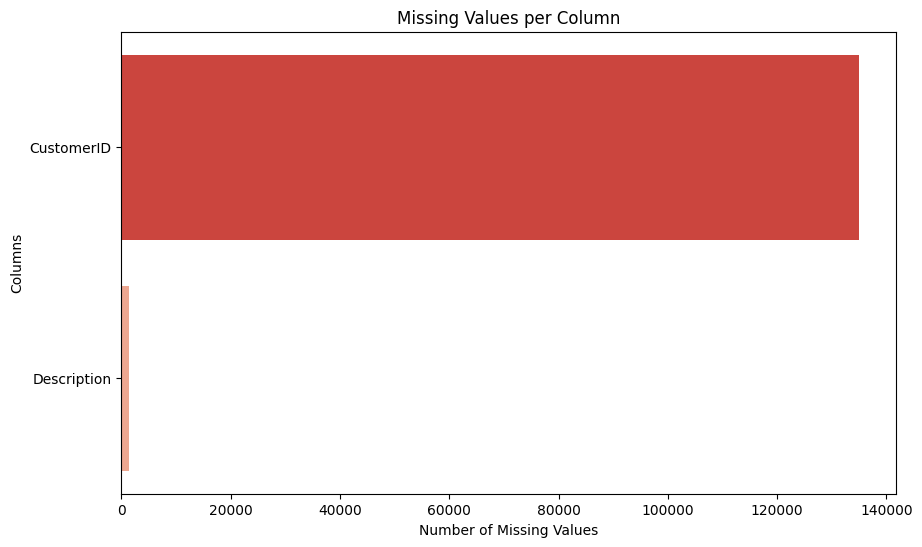

In [12]:
# Visualizing the missing values
# Missingno Matrix
msno.matrix(df_clean)
plt.show()

# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in each Columns of the Dataset - Heatmap')
plt.show()

# Bar Chat for a more clear Visualization of the missing values
missing = df_clean.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values per Column')
plt.show()



Variables Understanding

In [13]:
# Dataset Columns
print("Columns Present in the Dataset:")
print(df_clean.columns)

print("\n Data types of the columns of the dataset: ")
print(df_clean.dtypes)

Columns Present in the Dataset:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

 Data types of the columns of the dataset: 
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [14]:
# Dataset Describe
print("Description of the Dataset:")
print(df_clean.describe())

Description of the Dataset:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [15]:
# Check Unique Values for each variable.
print("Unique Values in each Columns of the Dataset: ")
print(df_clean.nunique())

Unique Values in each Columns of the Dataset: 
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [16]:
# Data Wrangling
# Drop rows with missing CustomerID
df_clean = df_clean.dropna(subset=['CustomerID'])

In [17]:
# Remove canceled orders (Quantity <= 0)
df_clean = df_clean[df_clean['Quantity'] > 0]

In [18]:
# Remove entries with non-positive price
df_clean = df_clean[df_clean['UnitPrice'] > 0]

In [19]:
# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [20]:
# Remove duplicates
df_clean = df_clean.drop_duplicates()


In [21]:
# Reset index
df_clean.reset_index(drop=True, inplace=True)

In [22]:
# Display shape after cleaning
print(f"Shape after cleaning: {df_clean.shape}")

Shape after cleaning: (392692, 8)


Preprocessing (Encoding + Normalization)

In [23]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode Country column (since it's categorical)
le = LabelEncoder()
df_clean['Country_Encoded'] = le.fit_transform(df_clean['Country'])

# Create TotalPrice column (Quantity * UnitPrice)
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Select features for normalization
scaler = MinMaxScaler()
df_clean[['Quantity', 'UnitPrice', 'TotalPrice']] = scaler.fit_transform(
    df_clean[['Quantity', 'UnitPrice', 'TotalPrice']]
)

df_clean.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_Encoded,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.000062,2010-12-01 08:26:00,0.000313,17850.0,United Kingdom,35,0.000091
1,536365,71053,WHITE METAL LANTERN,0.000062,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,35,0.000121
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.000086,2010-12-01 08:26:00,0.000338,17850.0,United Kingdom,35,0.000131
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.000062,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,35,0.000121
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.000062,2010-12-01 08:26:00,0.000416,17850.0,United Kingdom,35,0.000121


Feature Engineering (RFM - Recency, Frequency, Monetary)

In [24]:
import datetime as dt

# Reference date for Recency (1 day after last invoice date)
reference_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)

# Create RFM table grouped by CustomerID
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display RFM table
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,0.458146
1,12347.0,2,7,0.025582
2,12348.0,75,4,0.010668
3,12349.0,19,1,0.010432
4,12350.0,310,1,0.001985


In [25]:
from sklearn.preprocessing import StandardScaler

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


EDA - Plot Visualization.


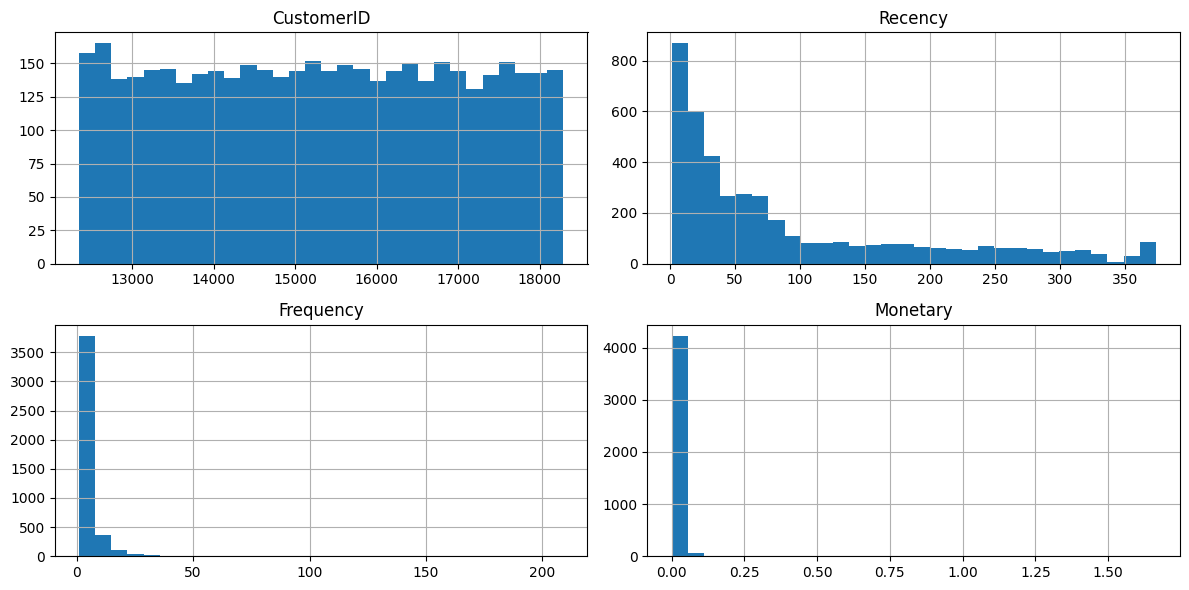

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
rfm.hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

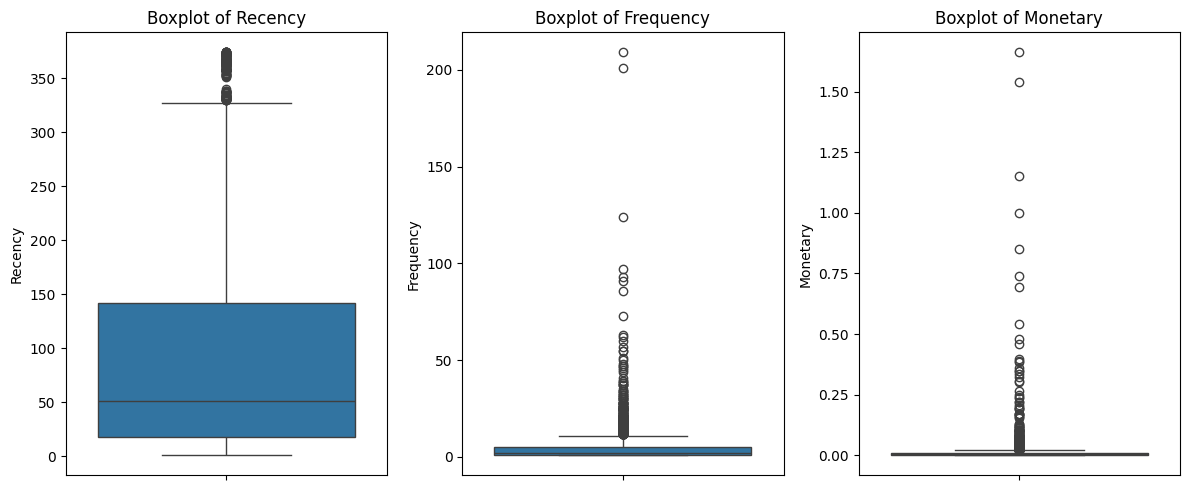

In [27]:
# Boxplots
plt.figure(figsize=(12, 5))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=rfm[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

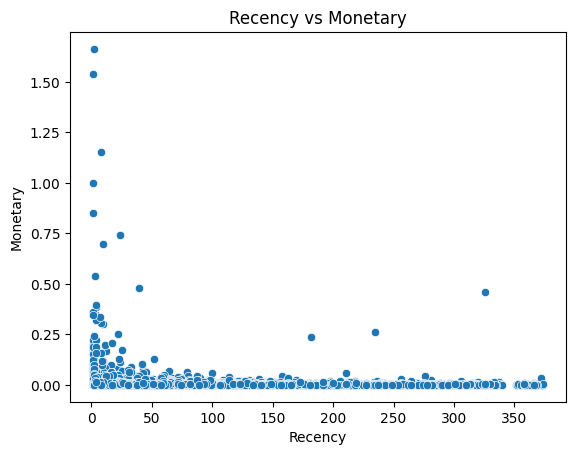

In [28]:
# Scatter plot
sns.scatterplot(data=rfm, x='Recency', y='Monetary')
plt.title("Recency vs Monetary")
plt.show()

/tmp/ipython-input-29-2309913145.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rfm['Frequency'], shade=True)


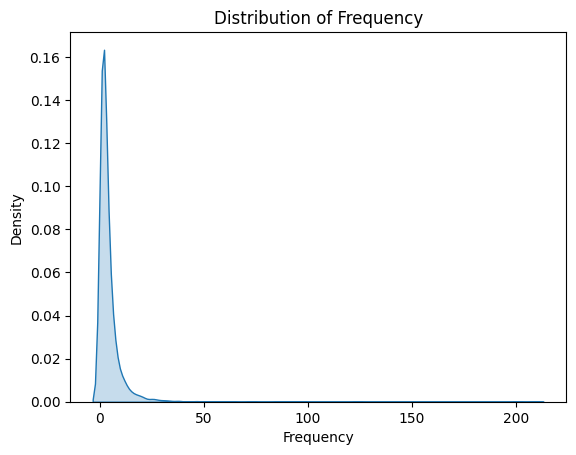

In [29]:
# KDE Plot
sns.kdeplot(rfm['Frequency'], shade=True)
plt.title("Distribution of Frequency")
plt.show()

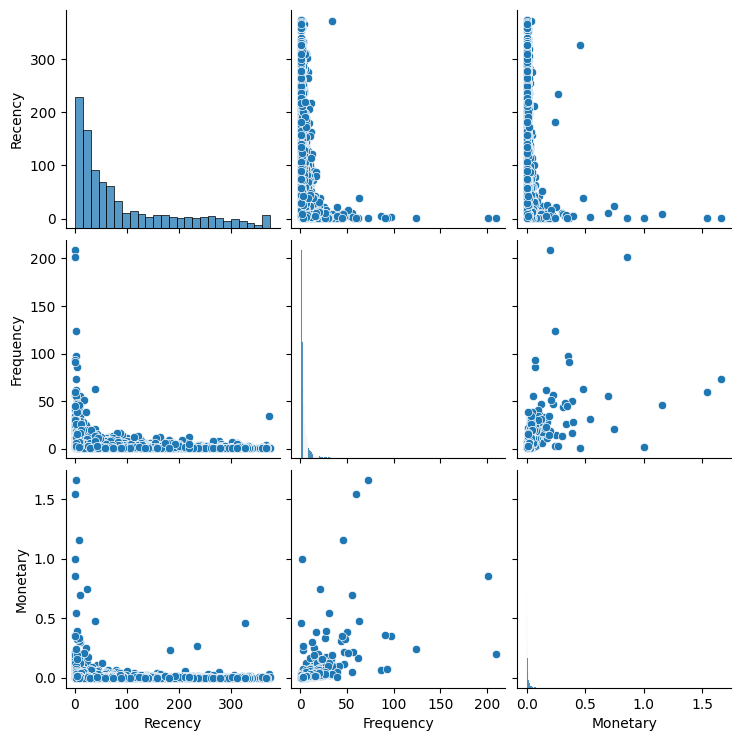

In [30]:
# Pairplot
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary']])
plt.show()

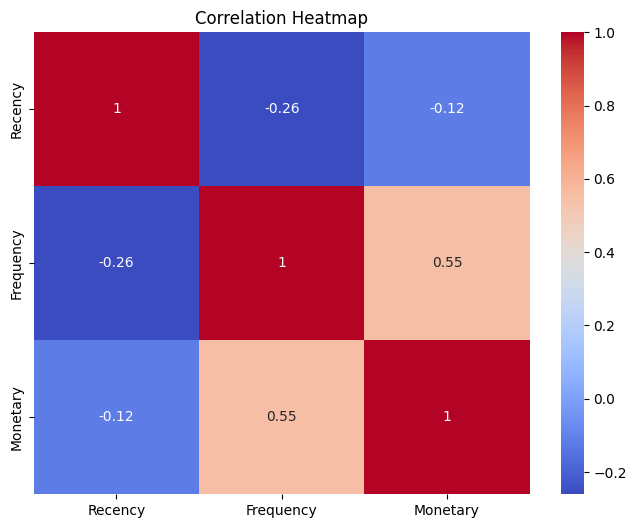

In [31]:
# Pairplot already shown above

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Outlier Detection – Z-score filtering

In [32]:
from scipy.stats import zscore

# Compute z-scores
z_scores = rfm[['Recency', 'Frequency', 'Monetary']].apply(zscore)
rfm_no_outliers = rfm[(z_scores < 3).all(axis=1)]


Dimensionality Reduction using PCA (for RFM)

In [33]:
from sklearn.decomposition import PCA

# Scale data before PCA
scaled_rfm = StandardScaler().fit_transform(rfm_no_outliers[['Recency', 'Frequency', 'Monetary']])

# Apply PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(scaled_rfm)


K-Means Clustering

In [34]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_pca)
rfm_no_outliers['Cluster'] = kmeans.labels_


/tmp/ipython-input-34-1691701232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_no_outliers['Cluster'] = kmeans.labels_


Model Tuning – GridSearchCV (Elbow Method + Custom Distance skipped)

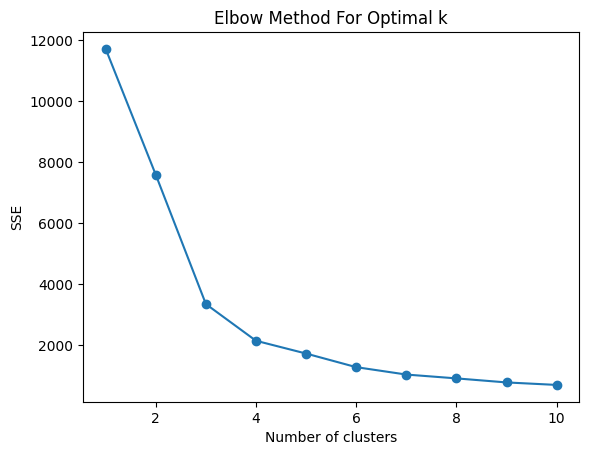

In [35]:
# Elbow Method
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_pca)
    sse.append(km.inertia_)

# Plot Elbow
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()


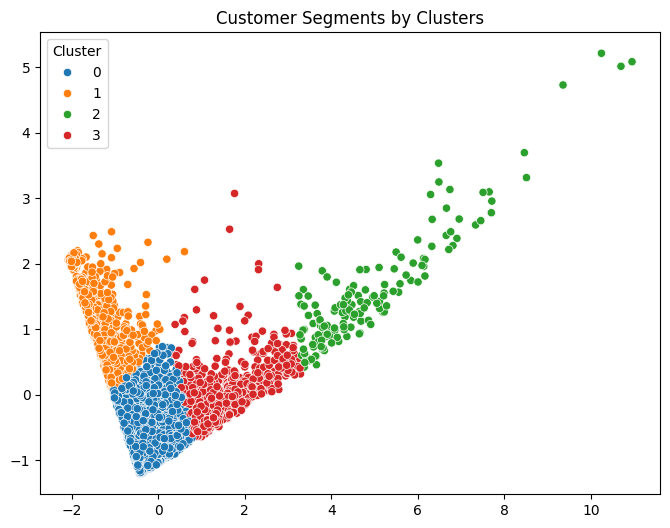

In [36]:
# Cluster Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_pca[:, 0], y=rfm_pca[:, 1], hue=rfm_no_outliers['Cluster'], palette='tab10')
plt.title('Customer Segments by Clusters')
plt.show()


In [37]:
# Add labels for business understanding (example logic)
def label_cluster(row):
    if row['Cluster'] == 0:
        return 'High-Value'
    elif row['Cluster'] == 1:
        return 'Low-Value'
    elif row['Cluster'] == 2:
        return 'New Customers'
    else:
        return 'Churn Risk'

rfm_no_outliers['Business_Label'] = rfm_no_outliers.apply(label_cluster, axis=1)

# Action Plan - sample display
action_plan = {
    'High-Value': 'Loyalty programs, Upsell',
    'Low-Value': 'Discount coupons, Feedback survey',
    'New Customers': 'Onboarding campaigns',
    'Churn Risk': 'Reactivation emails, Win-back offers'
}

rfm_no_outliers['Action_Plan'] = rfm_no_outliers['Business_Label'].map(action_plan)

# Display final table
rfm_no_outliers[['CustomerID', 'Cluster', 'Business_Label', 'Action_Plan']].head()


/tmp/ipython-input-37-95438617.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_no_outliers['Business_Label'] = rfm_no_outliers.apply(label_cluster, axis=1)
/tmp/ipython-input-37-95438617.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_no_outliers['Action_Plan'] = rfm_no_outliers['Business_Label'].map(action_plan)


,CustomerID,Cluster,Business_Label,Action_Plan
1,12347.0,3,Churn Risk,"Reactivation emails, Win-back offers"
2,12348.0,0,High-Value,"Loyalty programs, Upsell"
3,12349.0,0,High-Value,"Loyalty programs, Upsell"
4,12350.0,1,Low-Value,"Discount coupons, Feedback survey"
5,12352.0,3,Churn Risk,"Reactivation emails, Win-back offers"


/tmp/ipython-input-38-1361714111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_no_outliers['PCA1'] = rfm_pca[:, 0]
/tmp/ipython-input-38-1361714111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_no_outliers['PCA2'] = rfm_pca[:, 1]


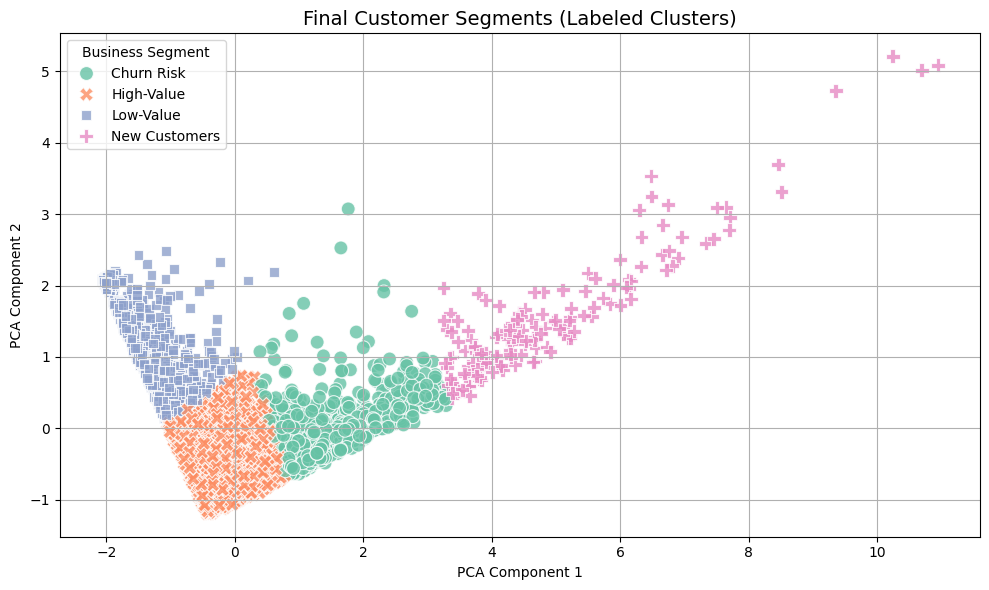

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add PCA components to the DataFrame for visualization
rfm_no_outliers['PCA1'] = rfm_pca[:, 0]
rfm_no_outliers['PCA2'] = rfm_pca[:, 1]

# Plot final clusters with business labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm_no_outliers,
    x='PCA1', y='PCA2',
    hue='Business_Label',
    palette='Set2',
    style='Business_Label',
    s=100,
    alpha=0.8
)
plt.title('Final Customer Segments (Labeled Clusters)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Business Segment')
plt.grid(True)
plt.tight_layout()
plt.show()
